## Merge of the dataset of oscar and movies budet/popu/rating 

the_oscar_award.csv comes from:  https://www.kaggle.com/datasets/unanimad/the-oscar-award
movie_stat.csv comes from : https://github.com/danielgrijalva/movie-stats/blob/master/movies.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
# oscars dataset : drop useless columns, change name to match the other datasets, keep only 4 categories of nominations
oscars = pd.read_csv('data/the_oscar_award.csv')
#oscars = oscars[oscars['category'].str.contains('ACTOR|ACTOR IN A SUPPORTING ROLE|ACTRESS|ACTRESS IN A SUPPORTING ROLE|DIRECTING', regex=True)]
oscars.rename(columns={'film': 'movie_name'}, inplace=True)
oscars.rename(columns={'year_film': 'Movie release date'}, inplace=True)

oscars['movie_name'] = oscars['movie_name'].str.lower().str.replace(' ', '_')

oscars

,Movie release date,year_ceremony,ceremony,category,name,movie_name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,the_noose,False
1,1927,1928,1,ACTOR,Emil Jannings,the_last_command,True
2,1927,1928,1,ACTRESS,Louise Dresser,a_ship_comes_in,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th_heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,sadie_thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,past_lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [3]:
# need to have only one row per movie: addition of a 'num_nominations' column to count the number of nominations per movie, 
# and a 'winner' column to know if the movie won the category and by who --> will be matched with the actors we are interested in

oscars_to_merge = oscars.groupby(['movie_name'], as_index=False).agg({
    'Movie release date': 'first',
    'category': lambda x: ', '.join(f"{cat}: {name}" for cat, name in zip(x, oscars.loc[x.index, 'name'])),
    'winner': lambda x: ', '.join(oscars.loc[x.index, 'name'][oscars.loc[x.index, 'winner']]),
    'category': 'count'
}).rename(columns={'category': 'num_nominations'})

oscars_to_merge['winner'].value_counts()

KeyboardInterrupt: 

In [ ]:
movie_stats = pd.read_csv('data/movie_stats.csv')
movie_stats.rename(columns={'name': 'movie_name'}, inplace=True)
movie_stats.rename(columns={'year': 'Movie release date'}, inplace=True)
movie_stats['movie_name'] = movie_stats['movie_name'].str.lower().str.replace(' ', '_')

def convert_to_datetime(date):
    # Check if the date is just a year (4 digits) and convert it to 'yyyy-01-01' format
    if len(str(date)) == 4 and str(date).isdigit():  # Only year (e.g., 1988)
        return pd.to_datetime(str(date) + '-01-01')
    else:
        return pd.to_datetime(date, errors='coerce')  # Convert if it's in a full date format

movie_stats['Movie release date'] = movie_stats['Movie release date'].apply(convert_to_datetime)
movie_stats['Movie release date'] = movie_stats['Movie release date'].dt.year

movie_stats


,movie_name,rating,genre,Movie release date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,the_shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,the_blue_lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,star_wars:_episode_v_-_the_empire_strikes_back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,more_to_life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,dream_round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,saving_mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,it's_just_us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
# CMU Movie dataset : kept all columns, change name to match the other datasets

original_data = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
original_data.rename(columns={'Movie name': 'movie_name'}, inplace=True)

original_data['movie_name'] = original_data['movie_name'].str.lower().str.replace(' ', '_')

original_data['Movie release date'] = original_data['Movie release date'].apply(convert_to_datetime)
original_data['Movie release date'] = original_data['Movie release date'].dt.year

original_data

,Wikipedia movie ID,Freebase movie ID,movie_name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,mermaids:_the_body_found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,another_nice_mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [ ]:
# merged original and movie stats 
merged = pd.merge(original_data, movie_stats, on=['movie_name', 'Movie release date'], how='left')
final_merged_data = merged.merge(oscars_to_merge, on=['movie_name', 'Movie release date'], how='left')

# drop irelevant columns
final_merged_data.drop(columns=['Wikipedia movie ID', 'genre', 'released', 'country', 'runtime', 'rating', 'writer'], inplace=True)

# #rename for homogeneity
final_merged_data.rename(columns={'movie_name': 'Movie name', 'score': 'Movie score', 'votes': 'Movie votes', 'director': 'Movie director', 'star': 'Movie star', 'budget': 'Movie budget', 'gross': 'Movie gross', 'company': 'Movie company', 'num_nominations': 'Number of nomination', 'winner': 'Nomination winner'}, inplace=True)

# addition of the budget/revenues ratio 
final_merged_data['Revenue/Budget ratio'] = final_merged_data['Movie box office revenue'] / final_merged_data['Movie budget']

# change of type 
final_merged_data['Movie release date'] = final_merged_data['Movie release date'].astype('Int64')

# cleaner format of the columns
def get_key_values(x):
     return ', '.join(x.values())

final_merged_data['Movie genres'] = final_merged_data['Movie genres'].apply(eval).apply(get_key_values)
#final_merged_data['Movie languages'] = final_merged_data['Movie languages'].apply(eval).apply(get_key_values) # get issue when saving to csv: 'utf-8' codec can't encode characters in position 33-44: surrogates not allowed"
final_merged_data['Movie countries'] = final_merged_data['Movie countries'].apply(eval).apply(get_key_values)

final_merged_data.to_csv('data/final_merged_data.csv', index=False)
final_merged_data


,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio
0,/m/03vyhn,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,brun_bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,white_of_the_eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,/m/01mrr1,a_woman_in_flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,/m/0j7hxnt,mermaids:_the_body_found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81737,/m/0g4pl34,knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81738,/m/02pygw1,another_nice_mess,1972,NaN,66.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Satire, Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81739,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}",Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\text{Weighted Rating} = \frac{(v / (v + m)) \times R + (m / (v + m)) \times C}$

## Creation of the criteria for rating **film success**



In [ ]:
clean_df = final_merged_data.dropna(subset=['Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Revenue/Budget ratio']).copy()
clean_df[['Movie name', 'Movie genres', 'Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Nomination winner','Revenue/Budget ratio']].sort_values(by='Revenue/Budget ratio', ascending = False)

,Movie name,Movie genres,Movie box office revenue,Movie budget,Movie score,Movie votes,Nomination winner,Revenue/Budget ratio
33438,the_blair_witch_project,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",248639099.0,60000.0,6.5,239000.0,NaN,4143.984983
67652,el_mariachi,"Thriller, Action/Adventure, Gangster Film, Ind...",2040920.0,7000.0,6.9,64000.0,NaN,291.560000
29206,napoleon_dynamite,"Indie, Absurdism, Cult, Coming of age, Comedy,...",46118099.0,400000.0,6.9,204000.0,NaN,115.295248
31667,in_the_company_of_men,"Black comedy, Drama, Indie",2856622.0,25000.0,7.2,13000.0,NaN,114.264880
24914,keeping_mum,"Black comedy, Comedy",18575768.0,169000.0,6.8,34000.0,NaN,109.915787
...,...,...,...,...,...,...,...,...
76987,the_boondock_saints,"LGBT, Thriller, Buddy film, Indie, Drama, Crim...",30471.0,6000000.0,7.8,230000.0,NaN,0.005078
58128,best_laid_plans,"Crime Fiction, Thriller, Psychological thrille...",27816.0,7000000.0,6.1,7400.0,NaN,0.003974
49848,rock_&_rule,"Musical, Science Fiction, Animation",30379.0,8000000.0,6.5,3400.0,NaN,0.003797
19093,dangerous_game,"Drama, Indie",23671.0,10000000.0,5.6,3600.0,NaN,0.002367


In [ ]:
# Set a cap at the 95th percentile, so every movie above this cap has max revenue/budget score. This brings outliers with absurdly high ratios to skew data 
#cap_value = clean_df['Revenue/Budget ratio'].quantile(0.95)
#print(cap_value)
clean_df['Log Revenue/Budget ratio'] = clean_df['Revenue/Budget ratio'].apply(np.log)


#Now normalize the log values to a 0-10 scale
clean_df['Normalized Revenue/Budget ratio'] = 10 * (
    clean_df['Log Revenue/Budget ratio'] - clean_df['Log Revenue/Budget ratio'].min()) / (
    clean_df['Log Revenue/Budget ratio'].max() - clean_df['Log Revenue/Budget ratio'].min())

clean_df.sort_values(by='Revenue/Budget ratio', ascending = False)
#clean_df.sort_values(by='Normalized Revenue/Budget ratio', ascending= False).head(100)

#clean_df.shape

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio
33438,/m/07byq,the_blair_witch_project,1999,248639099.0,105.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",6.5,239000.0,Daniel Myrick,Heather Donahue,60000.0,248639099.0,Haxan Films,NaN,NaN,4143.984983,8.329413,10.000000
67652,/m/01w63r,el_mariachi,1992,2040920.0,81.0,"{""/m/06nm1"": ""Spanish Language""}","Mexico, United States of America","Thriller, Action/Adventure, Gangster Film, Ind...",6.9,64000.0,Robert Rodriguez,Carlos Gallardo,7000.0,2040920.0,Columbia Pictures,NaN,NaN,291.560000,5.675246,8.185692
29206,/m/03lfd_,napoleon_dynamite,2004,46118099.0,86.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Indie, Absurdism, Cult, Coming of age, Comedy,...",6.9,204000.0,Jared Hess,Jon Heder,400000.0,46138887.0,Fox Searchlight Pictures,NaN,NaN,115.295248,4.747496,7.551511
31667,/m/02cky7,in_the_company_of_men,1997,2856622.0,93.0,"{""/m/02h40lc"": ""English Language""}","United States of America, Canada","Black comedy, Drama, Indie",7.2,13000.0,Neil LaBute,Aaron Eckhart,25000.0,2804473.0,Alliance Atlantis Communications,NaN,NaN,114.264880,4.738519,7.545374
24914,/m/083gcx,keeping_mum,2005,18575768.0,102.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Black comedy, Comedy",6.8,34000.0,Niall Johnson,Rowan Atkinson,169000.0,18586834.0,Summit Entertainment,NaN,NaN,109.915787,4.699714,7.518848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76987,/m/02kp5p,the_boondock_saints,1999,30471.0,108.0,"{""/m/06nm1"": ""Spanish Language"", ""/m/02h40lc"":...","United States of America, Canada","LGBT, Thriller, Buddy film, Indie, Drama, Crim...",7.8,230000.0,Troy Duffy,Willem Dafoe,6000000.0,30471.0,Franchise Pictures,NaN,NaN,0.005078,-5.282739,0.695147
58128,/m/0b4rz4,best_laid_plans,1999,27816.0,94.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Crime Fiction, Thriller, Psychological thrille...",6.1,7400.0,Mike Barker,Alessandro Nivola,7000000.0,27816.0,Dogstar Films,NaN,NaN,0.003974,-5.528054,0.527457
49848,/m/06yv87,rock_&_rule,1983,30379.0,77.0,"{""/m/02h40lc"": ""English Language""}",Canada,"Musical, Science Fiction, Animation",6.5,3400.0,Clive Smith,Don Francks,8000000.0,30379.0,Nelvana,NaN,NaN,0.003797,-5.573445,0.496429
19093,/m/027jdg0,dangerous_game,1993,23671.0,104.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Drama, Indie",5.6,3600.0,Abel Ferrara,Harvey Keitel,10000000.0,1261210.0,Cecchi Gori Europa N.V.,NaN,NaN,0.002367,-6.046090,0.173344


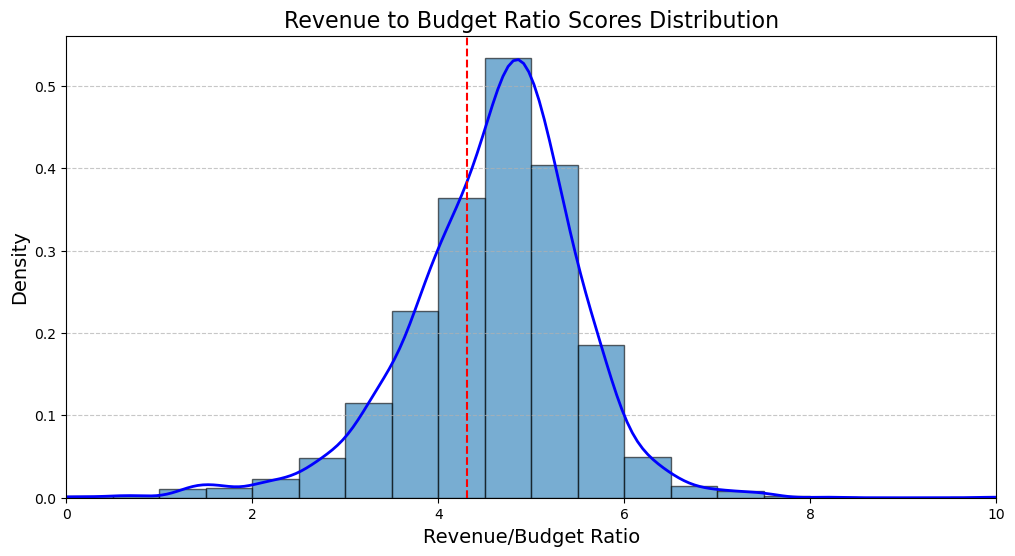

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.hist(clean_df['Normalized Revenue/Budget ratio'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Normalized Revenue/Budget ratio', color='blue', linewidth=2)

plt.title('Revenue to Budget Ratio Scores Distribution', fontsize=16)
plt.xlabel('Revenue/Budget Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=(10*(0 - clean_df['Log Revenue/Budget ratio'].min()) / (clean_df['Log Revenue/Budget ratio'].max() - clean_df['Log Revenue/Budget ratio'].min())),
            color='red', linestyle='--') #Visualize break-even point
plt.show()

In [ ]:
#Creation of the revenue index

#clean_df.sort_values(by='Movie box office revenue', ascending=False)


clean_df['Log revenue'] = np.log10(clean_df['Movie box office revenue'] + 1)
clean_df['Log revenue index'] = 10 * (clean_df['Log revenue'] - clean_df['Log revenue'].min())/(clean_df['Log revenue'].max() - clean_df['Log revenue'].min())

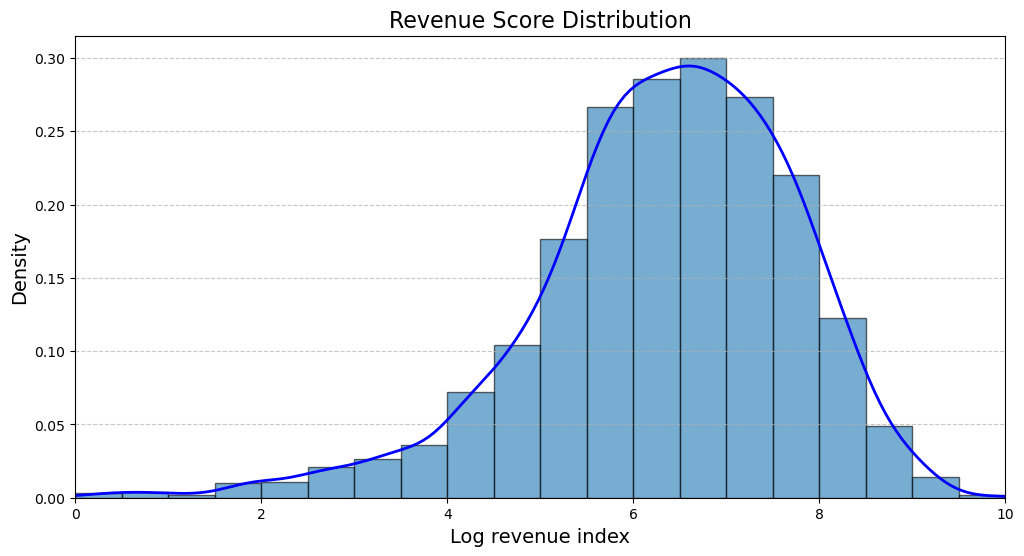

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Log revenue index'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Log revenue index', color='blue', linewidth=2)

plt.title('Revenue Score Distribution', fontsize=16)
plt.xlabel('Log revenue index', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

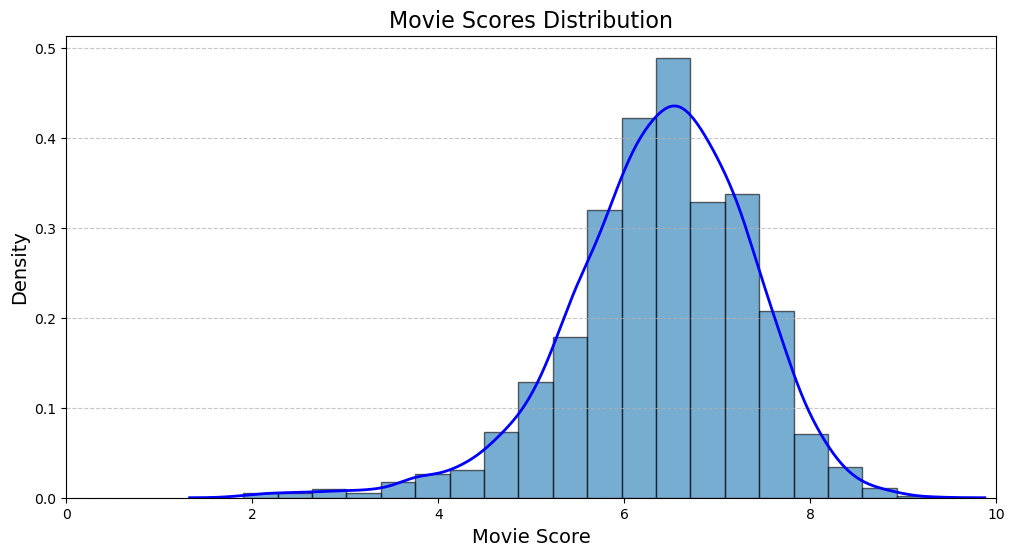

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Movie score'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Movie score', color='blue', linewidth=2)

plt.title('Movie Scores Distribution', fontsize=16)
plt.xlabel('Movie Score', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
multiplier_weight = 0.25/np.log(clean_df['Number of nomination'].max()+1)

# put a score of 0 for movies with no nominations
clean_df['Number of nomination'].fillna(0, inplace=True)
clean_df['Nomination multiplier'] = 1 + multiplier_weight * (np.log(clean_df['Number of nomination'] +1))




C:\Users\matsa\AppData\Local\Temp\ipykernel_6980\13565407.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Number of nomination'].fillna(0, inplace=True)


In [ ]:
clean_df.sort_values(by='Nomination multiplier', ascending = False)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier
33965,/m/026p4q7,the_curious_case_of_benjamin_button,2008,333932083.0,166.0,"{""/m/064_8sq"": ""French Language"", ""/m/06b_j"": ...",United States of America,"Romantic drama, Film adaptation, Mystery, Peri...",7.8,605000.0,...,335802786.0,Warner Bros.,13.0,Art Direction: Donald Graham Burt; Set Decorat...,2.226214,0.800302,4.853329,8.523658,8.269705,1.25
65287,/m/0bdjd,forrest_gump,1994,677387716.0,136.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Coming of age, Comedy film, Drama, War film, R...",8.8,1900000.0,...,678226133.0,Paramount Pictures,13.0,"Tom Hanks, Robert Zemeckis, Arthur Schmidt, We...",12.316140,2.510911,6.022649,8.830837,8.846968,1.25
67344,/m/0m313,shakespeare_in_love,1998,289317794.0,137.0,"{""/m/02h40lc"": ""English Language""}","United States of America, United Kingdom","Romantic comedy, Costume drama, Comedy-drama, ...",7.1,217000.0,...,289317794.0,Universal Pictures,13.0,"Gwyneth Paltrow, Judi Dench, Art Direction: M...",11.572712,2.448650,5.980089,8.461375,8.152660,1.25
65381,/m/01cmp9,chicago,2002,306776732.0,80.0,"{""/m/02h40lc"": ""English Language"", ""/m/02ztjwg...","United States of America, Canada, Germany","Crime Fiction, Musical, Drama, Comedy",7.2,220000.0,...,306776732.0,Miramax,13.0,"Catherine Zeta-Jones, Art Direction: John Myh...",6.817261,1.919458,5.618350,8.486822,8.200482,1.25
79973,/m/017gl1,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,871530324.0,178.0,"{""/m/02h40lc"": ""English Language""}","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Fantasy, F...",8.8,1700000.0,...,897690072.0,New Line Cinema,13.0,"Andrew Lesnie, Peter Owen, Richard Taylor, How...",9.371294,2.237651,5.835857,8.940283,9.052642,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29776,/m/0bftwt,the_super,1991,11000863.0,98.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, Japan","Japanese Movies, Comedy",5.6,5400.0,...,11000863.0,Largo Entertainment,0.0,NaN,0.500039,-0.693069,3.832506,7.041427,5.484237,1.00
29809,/m/0838sl,a_low_down_dirty_shame,1994,29392418.0,100.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"LGBT, Crime Fiction, Detective fiction, Detect...",6.0,6700.0,...,29392418.0,Caravan Pictures,0.0,NaN,2.939242,1.078152,5.043258,7.468235,6.286312,1.00
29859,/m/0cd3kf,krull,1983,16519463.0,121.0,"{""/m/02h40lc"": ""English Language""}","United States of America, United Kingdom","Science Fiction, Sword and sorcery films, Stop...",6.1,31000.0,...,16916617.0,Columbia Pictures,0.0,NaN,0.351478,-1.045608,3.591521,7.217996,5.816052,1.00
29871,/m/073x6l,personal_best,1982,5672311.0,124.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"LGBT, Gay, Sports, Gay Interest, Drama, Gay Th...",6.3,2600.0,...,5672311.0,The Geffen Company,0.0,NaN,0.354519,-1.036992,3.597410,6.753760,4.943642,1.00


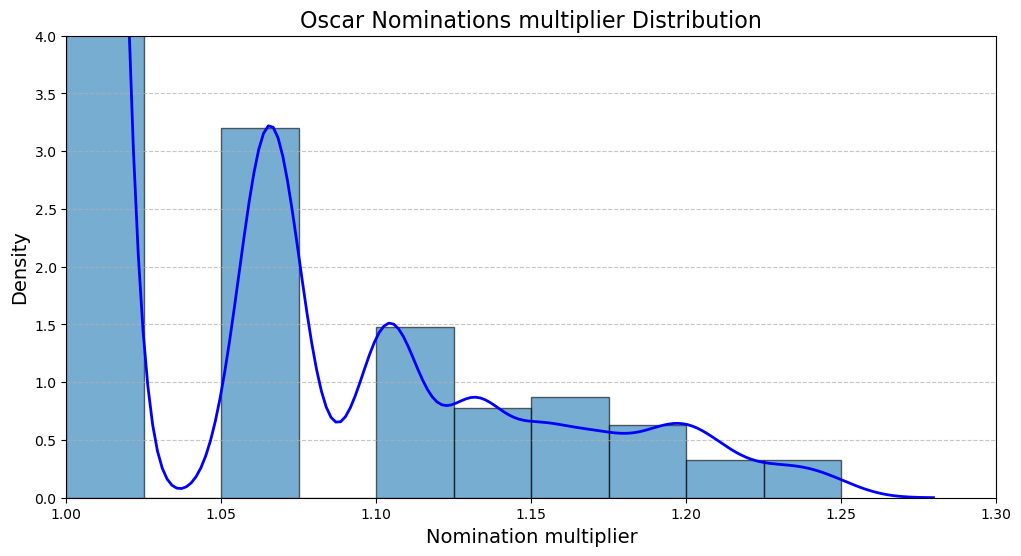

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Nomination multiplier'], bins=10, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Nomination multiplier', color='blue', linewidth=2)

plt.title('Oscar Nominations multiplier Distribution', fontsize=16)
plt.xlabel('Nomination multiplier', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((1, 1.3))
plt.ylim((0,4))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# For the moment we choose these weights
weight_popularity = 0.40
weight_revenue_ratio = 0.15
weight_revenue = 0.45

max_possible_score = (
    10 * weight_popularity +
    10 * weight_revenue_ratio +
    10 * weight_revenue
) * clean_df['Nomination multiplier'].max()

# Success index calculation
clean_df['Success Index'] = (
    (clean_df['Movie score'] * weight_popularity +
    clean_df['Normalized Revenue/Budget ratio'] * weight_revenue_ratio +
    clean_df['Log revenue index'] * weight_revenue) *
    clean_df['Nomination multiplier']
) / max_possible_score *10



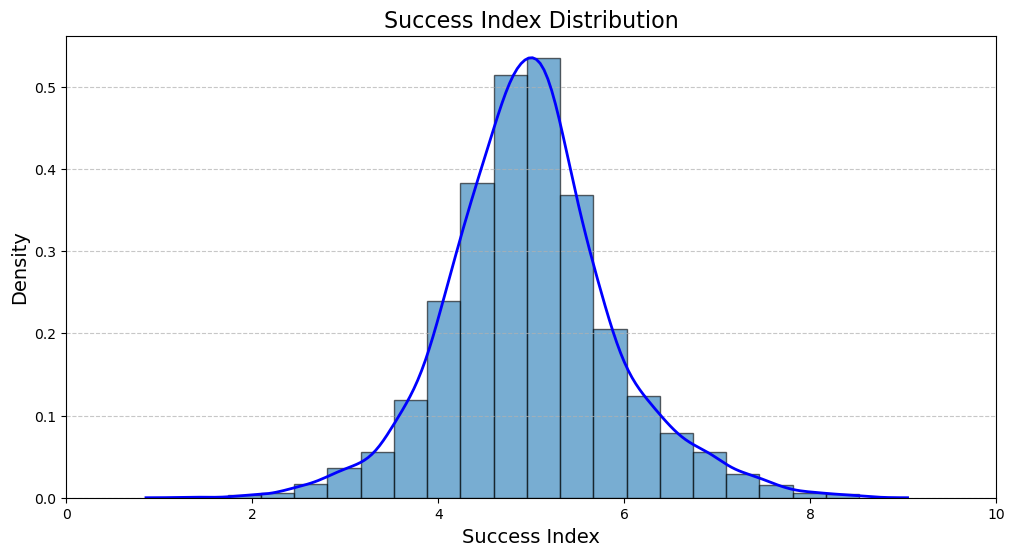

In [ ]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Success Index'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Success Index', color='blue', linewidth=2)

plt.title('Success Index Distribution', fontsize=16)
plt.xlabel('Success Index', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
clean_df.loc[clean_df['Success Index'] > 5].sort_values(by='Success Index', ascending= False).head(20)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index
80920,/m/017jd9,the_lord_of_the_rings:_the_return_of_the_king,2003,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",8.9,1700000.0,...,New Line Cinema,11.0,Art Direction: Grant Major; Set Decoration: Da...,11.914144,2.477726,5.999965,9.049191,9.257307,1.235397,8.525014
79973,/m/017gl1,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,8.715303e+08,178.0,"{""/m/02h40lc"": ""English Language""}","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Fantasy, F...",8.8,1700000.0,...,New Line Cinema,13.0,"Andrew Lesnie, Peter Owen, Richard Taylor, How...",9.371294,2.237651,5.835857,8.940283,9.052642,1.250000,8.469067
65287,/m/0bdjd,forrest_gump,1994,6.773877e+08,136.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Coming of age, Comedy film, Drama, War film, R...",8.8,1900000.0,...,Paramount Pictures,13.0,"Tom Hanks, Robert Zemeckis, Arthur Schmidt, We...",12.316140,2.510911,6.022649,8.830837,8.846968,1.250000,8.404533
23702,/m/0bth54,avatar,2009,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",7.8,1100000.0,...,Twentieth Century Fox,9.0,Production Design: Rick Carter and Robert Stro...,11.739558,2.462964,5.989874,9.444400,10.000000,1.218126,8.301265
38158,/m/0btpm6,the_dark_knight,2008,1.004558e+09,153.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","United States of America, United Kingdom","Crime Fiction, Thriller, Superhero movie, Crim...",9.0,2400000.0,...,Warner Bros.,8.0,"Heath Ledger, Richard King",5.430046,1.691948,5.462831,9.001975,9.168577,1.208145,8.259153
25386,/m/0hfzr,schindler's_list,1993,3.213063e+08,186.0,"{""/m/064_8sq"": ""French Language"", ""/m/05qqm"": ...",United States of America,"Tragedy, Biography, History, War film, Biopic ...",8.9,1200000.0,...,Universal Pictures,12.0,Art Direction: Allan Starski; Set Decoration...,14.604832,2.681352,6.139158,8.506919,8.238249,1.242980,8.142099
60260,/m/0661ql3,inception,2010,8.255328e+08,148.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Psycholo...",8.8,2100000.0,...,Warner Bros.,8.0,"Wally Pfister, Richard King, Lora Hirschberg, ...",5.159580,1.640855,5.427905,8.916734,9.008389,1.208145,8.107097
24211,/m/07024,saving_private_ryan,1998,4.818409e+08,169.0,"{""/m/064_8sq"": ""French Language"", ""/m/01wgr"": ...",United States of America,"Ensemble Film, History, Drama, War film, Actio...",8.6,1300000.0,...,Dreamworks Pictures,11.0,"Janusz Kaminski, Steven Spielberg, Michael Kah...",6.883442,1.929119,5.624954,8.682904,8.568965,1.235397,8.044687
57552,/m/0jqn5,e.t._the_extra-terrestrial,1982,7.929106e+08,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Science Fiction, Adventure, Children's/Family,...",7.8,381000.0,...,Universal Pictures,9.0,"John Williams, Robert Knudson, Robert Glass, D...",75.515291,4.324335,7.262251,8.899224,8.975484,1.218126,8.037978
8821,/m/017gm7,the_lord_of_the_rings:_the_two_towers,2002,9.260471e+08,179.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",8.7,1500000.0,...,New Line Cinema,6.0,"Ethan Van der Ryn, Michael Hopkins, Jim Rygiel...",9.851565,2.287630,5.870021,8.966633,9.102161,1.184338,8.012258


In [ ]:
clean_df.loc[clean_df['Movie name'] == 'avatar' ]

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index
23702,/m/0bth54,avatar,2009,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",7.8,1100000.0,...,Twentieth Century Fox,9.0,Production Design: Rick Carter and Robert Stro...,11.739558,2.462964,5.989874,9.4444,10.0,1.218126,8.301265


In [ ]:
clean_df.loc[clean_df['Movie countries'] != 'United States of America'].sort_values(by='Success Index', ascending=False)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,...,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index
80920,/m/017jd9,the_lord_of_the_rings:_the_return_of_the_king,2003,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",8.9,1700000.0,...,New Line Cinema,11.0,Art Direction: Grant Major; Set Decoration: Da...,11.914144,2.477726,5.999965,9.049191,9.257307,1.235397,8.525014
79973,/m/017gl1,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,8.715303e+08,178.0,"{""/m/02h40lc"": ""English Language""}","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Fantasy, F...",8.8,1700000.0,...,New Line Cinema,13.0,"Andrew Lesnie, Peter Owen, Richard Taylor, How...",9.371294,2.237651,5.835857,8.940283,9.052642,1.250000,8.469067
23702,/m/0bth54,avatar,2009,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",7.8,1100000.0,...,Twentieth Century Fox,9.0,Production Design: Rick Carter and Robert Stro...,11.739558,2.462964,5.989874,9.444400,10.000000,1.218126,8.301265
38158,/m/0btpm6,the_dark_knight,2008,1.004558e+09,153.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","United States of America, United Kingdom","Crime Fiction, Thriller, Superhero movie, Crim...",9.0,2400000.0,...,Warner Bros.,8.0,"Heath Ledger, Richard King",5.430046,1.691948,5.462831,9.001975,9.168577,1.208145,8.259153
60260,/m/0661ql3,inception,2010,8.255328e+08,148.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Psycholo...",8.8,2100000.0,...,Warner Bros.,8.0,"Wally Pfister, Richard King, Lora Hirschberg, ...",5.159580,1.640855,5.427905,8.916734,9.008389,1.208145,8.107097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78101,/m/083x3x,the_isle,2000,2.066600e+04,90.0,"{""/m/02hwhyv"": ""Korean Language""}",South Korea,"Thriller, Drama, World cinema",7.0,13000.0,...,Myung Film Company Ltd.,0.0,NaN,0.020666,-3.879265,1.654519,4.315277,0.361148,1.000000,2.568555
71478,/m/05b_gq,swept_away,2002,5.986450e+05,89.0,"{""/m/0349s"": ""Greek Language"", ""/m/02bjrlw"": ""...","Italy, United Kingdom","Romantic comedy, Romance Film, Comedy",3.6,16000.0,...,Screen Gems,0.0,NaN,0.059865,-2.815672,2.381559,5.777170,3.108395,1.000000,2.556809
49848,/m/06yv87,rock_&_rule,1983,3.037900e+04,77.0,"{""/m/02h40lc"": ""English Language""}",Canada,"Musical, Science Fiction, Animation",6.5,3400.0,...,Nelvana,0.0,NaN,0.003797,-5.573445,0.496429,4.482588,0.675564,1.000000,2.382774
39978,/m/0c911r,postal,2007,1.467410e+05,102.0,"{""/m/04306rv"": ""German Language"", ""/m/02h40lc""...","United States of America, Canada, Germany","Parody, Horror, Action Comedy, Action/Adventur...",4.5,22000.0,...,Boll Kino Beteiligungs GmbH & Co. KG,0.0,NaN,0.009783,-4.627136,1.143297,5.166554,1.960901,1.000000,2.283120


In [ ]:
# Checking correlation with relevant features we chose
correlation_with_gross = clean_df['Success Index'].corr(clean_df['Movie box office revenue'], method='pearson')
print("Correlation with Box Office Gross:", correlation_with_gross)
correlation_with_pop = clean_df['Success Index'].corr(clean_df['Movie score'], method='pearson')
print("Correlation with Popularity:", correlation_with_pop)
correlation_with_oscar = clean_df['Success Index'].corr(clean_df['Number of nomination'], method='pearson')
print("Correlation with Oscar Nominations:", correlation_with_oscar)



Correlation with Box Office Gross: 0.6033659167780281
Correlation with Popularity: 0.6392663691404632
Correlation with Oscar Nominations: 0.6166889141744984


In [ ]:

import statsmodels.api as sm

# Check if we can predict well box office revenue with our index
X = sm.add_constant(clean_df['Success Index'])  
Y = clean_df['Movie box office revenue']

model = sm.OLS(Y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Movie box office revenue   R-squared:                       0.364
Model:                                  OLS   Adj. R-squared:                  0.364
Method:                       Least Squares   F-statistic:                     2024.
Date:                      Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                              11:13:38   Log-Likelihood:                -70805.
No. Observations:                      3537   AIC:                         1.416e+05
Df Residuals:                          3535   BIC:                         1.416e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Actor group analysis



In [ ]:
success_threshold = 7

# take all the clean df that have more than 7 as a sucess index
print(f'Based on the weights we chose, we have {clean_df.loc[clean_df["Success Index"] >= success_threshold].shape[0]} movies with a success index greater than 7')

# select the movies based on the freebase movie ID to be able to merge with the cprresponding actors in characters.metadata.tsv
freebase_movie_id_successful = clean_df.loc[(clean_df['Success Index'] >= success_threshold)].sort_values(by='Movie release date', ascending= True)['Freebase movie ID']

Based on the weights we chose, we have 84 movies with a success index greater than 7


In [ ]:
character_data = pd.read_csv('data/character.metadata.tsv',
                             sep='\t', 
                             names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth', 'Actor gender', 
                                        'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID'])

successful_actor_data = character_data[character_data['Freebase movie ID'].isin(freebase_movie_id_successful)]

print(f'Based on the successful movies we selected, we have {successful_actor_data.shape[0]} actors that played in these movies (can be duplicated if they played in multiple movies).')

Based on the successful movies we selected, we have 1615 actors that played in these movies (can be duplicated if they played in multiple movies).


In [ ]:
# actors that played in multiple movies
multiple_movie_actors = successful_actor_data['Actor name'].value_counts().loc[lambda x: x > 1]
print(f"We have {multiple_movie_actors.shape[0]} actors who have appeared in multiple movies in our selection.")


#get a dataframe with only the actors that played in multiple movies
multiple_movie_actors_df = successful_actor_data[successful_actor_data['Actor name'].isin(multiple_movie_actors.index)]


# acrors that played in only one movie
single_movie_actors = successful_actor_data['Actor name'].value_counts().loc[lambda x: x == 1]
print(f"We have {single_movie_actors.shape[0]} actors who appeared in only one movie in our selection.")

# get a dataframe with only the actors that played in a single movie
single_movie_actors_df  = successful_actor_data[successful_actor_data['Actor name'].isin(single_movie_actors.index)]
single_movie_actors_df

# define unsuccessful movies and actors in those movies
unsuccessful_movies = clean_df[clean_df['Success Index'] < success_threshold]
unsuccessful_movie_ids = unsuccessful_movies['Freebase movie ID']
unsuccessful_actors = character_data[character_data['Freebase movie ID'].isin(unsuccessful_movie_ids)]

# identify single-movie actors who also appeared in unsuccessful movies
unsuccessful_actor_names = unsuccessful_actors['Actor name'].unique()
single_movie_unsuccessful_actor_names = set(single_movie_actors.index).intersection(unsuccessful_actor_names)

#  define a dataframe with only the actors that played in a single movie and also appeared in unsuccessful movies 
single_movie_unsuccessful_actor_df = character_data[character_data['Actor name'].isin(single_movie_unsuccessful_actor_names)]

print(f"We found {len(single_movie_unsuccessful_actor_names)} actors who played in only one successful movie but also appeared in unsuccessful movies.")



We have 165 actors who have appeared in multiple movies in our selection.
We have 1196 actors who appeared in only one movie in our selection.
We found 779 actors who played in only one successful movie but also appeared in unsuccessful movies.


## Actor career index

In [ ]:
merged_df = pd.merge(character_data, clean_df, on='Freebase movie ID', how='inner')

merged_df['Actor name'] = merged_df['Actor name'].str.lower().str.replace(' ', '_')
merged_df['Movie star'] = merged_df['Movie star'].str.lower().str.replace(' ', '_')
merged_df = merged_df.dropna(subset=['Actor name'])
merged_df


,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,wanda_de_jesus,42.0,...,Screen Gems,0.0,NaN,0.500387,-0.692374,3.832981,7.146464,5.681627,1.0,4.073343
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,natasha_henstridge,27.0,...,Screen Gems,0.0,NaN,0.500387,-0.692374,3.832981,7.146464,5.681627,1.0,4.073343
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,ice_cube,32.0,...,Screen Gems,0.0,NaN,0.500387,-0.692374,3.832981,7.146464,5.681627,1.0,4.073343
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,jason_statham,33.0,...,Screen Gems,0.0,NaN,0.500387,-0.692374,3.832981,7.146464,5.681627,1.0,4.073343
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,clea_duvall,23.0,...,Screen Gems,0.0,NaN,0.500387,-0.692374,3.832981,7.146464,5.681627,1.0,4.073343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52828,25920477,/m/0b6lqyd,2011-03-11,Minister Sudoku,NaN,M,NaN,NaN,lincoln_ward,NaN,...,Summit Entertainment,0.0,NaN,4.604147,1.526957,5.350048,8.168299,7.601900,1.0,5.778690
52829,25920477,/m/0b6lqyd,2011-03-11,College Student,NaN,M,NaN,NaN,kyle_gatehouse,NaN,...,Summit Entertainment,0.0,NaN,4.604147,1.526957,5.350048,8.168299,7.601900,1.0,5.778690
52830,25920477,/m/0b6lqyd,2011-03-11,Soda Can Guy,NaN,M,NaN,NaN,albert_kwan,NaN,...,Summit Entertainment,0.0,NaN,4.604147,1.526957,5.350048,8.168299,7.601900,1.0,5.778690
52831,25920477,/m/0b6lqyd,2011-03-11,Aviator Glasses Guy,1979-10-30,M,NaN,NaN,james_a._woods,31.0,...,Summit Entertainment,0.0,NaN,4.604147,1.526957,5.350048,8.168299,7.601900,1.0,5.778690


In [ ]:
# count movies for each actor
merged_df['Movie Count'] = merged_df.groupby('Actor name')['Movie name'].transform('count')

#actor_mult_movies = merged_df[merged_df['Movie Count'] > 1]

In [ ]:
# Sort by actor_name and release_date to ensure the correct order
actor_mult_movies = merged_df.sort_values(by=['Actor name', 'Movie release date_x']).reset_index(drop=True)

#Multiplier function
mul_factor = 0.15
penalty_threshold = -0.25

def multiplier_generator(group):
    cumulative_log_multiplier = 0
    multiplied_scores = []
    prev_score = None
    for row_number, (_, row) in enumerate(group.iterrows(), start=0):
        if row['Movie star'] == group.name:
            score = 1.25 * row['Success Index']
        else:
            score = row['Success Index']

        #Define the multiplier proportional to the movie score
        multiplier = 1 + (score / 10) * mul_factor

        if prev_score is not None:
            #Calculate the percentage of difference between the current and previous score
            score_diff_pct = (score - prev_score) / prev_score

            if score_diff_pct < penalty_threshold:
                multiplier = 1 + score_diff_pct
        # Accumulate log of multipliers to control overflow
        cumulative_log_multiplier += np.log(multiplier)
        cumulative_multiplier = np.exp(cumulative_log_multiplier)  # Convert back
       

        multiplied_scores.append(score * cumulative_multiplier)

        prev_score = score

    # Average cumulative score over the number of movies
    cumulative_score = np.log(sum(multiplied_scores) / len(multiplied_scores))
    return pd.Series({'Cumulative Score': cumulative_score})

actor_scores = actor_mult_movies.groupby('Actor name').apply(multiplier_generator)
actor_scores['Actor Score Index'] = 10 * (
    actor_scores['Cumulative Score'] - actor_scores['Cumulative Score'].min()) / (
    actor_scores['Cumulative Score'].max() - actor_scores['Cumulative Score'].min())

C:\Users\matsa\AppData\Local\Temp\ipykernel_6980\3801821320.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actor_scores = actor_mult_movies.groupby('Actor name').apply(multiplier_generator)


In [ ]:
actor_scores.sort_values('Actor Score Index', ascending=False)

,Cumulative Score,Actor Score Index
Actor name,,
denzel_washington,3.527584,10.000000
matt_damon,3.435967,9.691597
tom_hanks,3.274563,9.148275
frank_welker,3.253477,9.077296
eddie_murphy,3.205583,8.916074
...,...,...
stuart_nisbet,0.711873,0.521693
vladimir_dolinsky,0.711873,0.521693
evelyn_keyes,0.676027,0.401027


In [ ]:
actor_scores[actor_scores.index == 'samuel_l._jackson']

,Cumulative Score,Actor Score Index
Actor name,,
samuel_l._jackson,2.746312,7.370064


In [ ]:
actor_mult_movies
actor_unique = actor_mult_movies.drop_duplicates(subset=['Actor name'], keep='first')
actor_unique

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index,Movie Count
0,1371138,/m/04xg4z,1981-07-10,Squeaks,NaN,NaN,NaN,NaN,'squeeks'_the_caterpillar,NaN,...,0.0,NaN,5.288082,1.665456,5.444722,7.802479,6.914437,1.0,5.478564,1
1,21029252,/m/05b3f51,2009-03-13,NaN,1979-12-16,M,NaN,NaN,40_glocc,29.0,...,0.0,NaN,0.765271,-0.267525,4.123395,6.661967,4.771140,1.0,3.812418,1
2,2617126,/m/07s114,2005-11-09,Marcus,1975-07-06,M,1.829,/m/0x67,50_cent,30.0,...,0.0,NaN,1.161063,0.149336,4.408348,7.666916,6.659681,1.0,4.654487,4
6,2967115,/m/08gnl0,2001-09-10,Miles Pennfield II,NaN,NaN,NaN,NaN,a._delon_ellis_jr.,NaN,...,0.0,NaN,1.378200,0.320778,4.525541,7.644462,6.617485,1.0,4.973359,1
7,2887437,/m/08984j,2006-12-20,L.C. Luco,1962-06-02,M,NaN,NaN,a._j._benza,44.0,...,0.0,NaN,6.488380,1.870013,5.584551,8.192348,7.647093,1.0,5.695099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52718,3574823,/m/09mjxy,1999-09-24,Lina's Mother,NaN,F,NaN,NaN,éva_igó,NaN,...,0.0,NaN,0.110142,-2.205983,2.798324,6.695167,4.833530,1.0,4.155870,1
52719,5523710,/m/0dqvh3,2001-04-20,Jaime,1987-12-31,M,NaN,NaN,íñigo_garcés,13.0,...,0.0,NaN,1.435338,0.361400,4.553309,6.810167,5.049643,1.0,4.732269,1
52720,9183160,/m/0b6l1st,2010-04-22,Cougar,1975-05-04,M,NaN,NaN,óscar_jaenada,34.0,...,0.0,NaN,1.175189,0.161429,4.416615,7.468048,6.285960,1.0,4.808939,3
52723,1400747,/m/04zm1f,1992-09-18,NaN,1957-08-15,M,1.700,/m/04_tz7,željko_ivanek,35.0,...,0.0,NaN,0.817504,-0.201500,4.168528,7.167762,5.721651,1.0,4.768018,14


In [ ]:
from wikipediaapi import Wikipedia
import re
from datetime import datetime
USER_AGENT = "ADAProject (mathieu.sanchezdesouza@epfl.ch)"
# Initialize Wikipedia API
wiki_wiki = Wikipedia(
    language ='en', 
    user_agent = USER_AGENT,
    headers = {'User-Agent': USER_AGENT})

# fetch actor date of birth
def fetch_actor_values(actor_name):
    page = wiki_wiki.page(actor_name)
    dob = None
    gender = None
    if page.exists():
        
        summary = page.summary
        content = page.text.lower()
        if 'he is' in content or 'his' in content:
            gender = 'M'
        elif 'she is' in content or 'her' in content:
            gender = 'F'
        
        # Use regex to find a date in the format "Month Day, Year"
        match = re.search(r"\b(January|February|March|April|May|June|July|August|September|October|November|December) \d{1,2}, \d{4}\b", summary)
        if match:
            dob_str = match.group()  
            
            try:
                
                dob = pd.to_datetime(dob_str).strftime('%Y-%m-%d')

            except ValueError:
                pass  # In case parsing fails, return None
    return dob, gender

actor_name = "a._jay_radcliff"  
actor_dob, gender= fetch_actor_values(actor_name)




In [ ]:
""" from tqdm.notebook import tqdm_notebook
# Filter rows with missing 'Actor date of birth'
missing_values_actors = actor_unique[
    actor_unique['Actor height'].isna() 
]

import requests

# Function to fetch actor height from Wikidata
def fetch_actor_height_wikidata(actor_name):
    # Convert actor name to query-friendly format
    query_name = actor_name.replace('_', ' ').title()  # E.g., "tom_hanks" -> "Tom Hanks"

    # SPARQL query to get height
    query = f"""
    SELECT ?height WHERE {{
      ?person rdfs:label "{query_name}"@en.
      ?person wdt:P2048 ?height.  # P2048 is the Wikidata property for height in cm
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/json"}
    response = requests.get(url, params={"query": query}, headers=headers)

    if response.status_code == 200:
        results = response.json()
        if results['results']['bindings']:
            return float(results['results']['bindings'][0]['height']['value']) / 100  # Convert cm to meters
    return None

# Iterate through actors_unique dataframe and fill missing heights
def fill_actor_heights(df):
    for index, row in tqdm_notebook(df[df['Actor height'].isna()].iterrows(), total = len(df[df['Actor height'].isna()]) ):
        actor_name = row['Actor name']
        actor_height = fetch_actor_height_wikidata(actor_name)  # Fetch height
        
        if actor_height:  # Update dataframe if height is found
            df.at[index, 'Actor height'] = actor_height
    return df


# Fill missing heights
actor_unique = fill_actor_heights(actor_unique)
 """

IndentationError: unexpected indent (3827133368.py, line 16)

In [ ]:
for index, row in progress_bar:
    actor_name = row['Actor name']  
    dob, gender = fetch_actor_values(actor_name)
    
    # Update the dataframe with the retrieved values if available
    if dob:
        actor_unique.at[index, 'Actor date of birth'] = dob
    if gender:
        actor_unique.at[index, 'Actor gender'] = gender

missing_values_actors

NameError: name 'progress_bar' is not defined

In [3]:
actors = pd.read_csv('data/actor_unique_data.csv')
actors

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index,Movie Count
0,1371138,/m/04xg4z,1981-07-10,Squeaks,NaN,NaN,NaN,NaN,'squeeks'_the_caterpillar,NaN,...,0.0,NaN,5.288082,1.665456,5.444722,7.802479,6.914437,1.0,5.478564,1
1,21029252,/m/05b3f51,2009-03-13,NaN,1979-12-16,M,NaN,NaN,40_glocc,29.0,...,0.0,NaN,0.765271,-0.267525,4.123395,6.661967,4.771140,1.0,3.812418,1
2,2617126,/m/07s114,2005-11-09,Marcus,1975-07-06,M,1.829,/m/0x67,50_cent,30.0,...,0.0,NaN,1.161063,0.149336,4.408348,7.666916,6.659681,1.0,4.654487,4
3,2967115,/m/08gnl0,2001-09-10,Miles Pennfield II,NaN,NaN,NaN,NaN,a._delon_ellis_jr.,NaN,...,0.0,NaN,1.378200,0.320778,4.525541,7.644462,6.617485,1.0,4.973359,1
4,2887437,/m/08984j,2006-12-20,L.C. Luco,1962-06-02,M,NaN,NaN,a._j._benza,44.0,...,0.0,NaN,6.488380,1.870013,5.584551,8.192348,7.647093,1.0,5.695099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20688,3574823,/m/09mjxy,1999-09-24,Lina's Mother,NaN,F,NaN,NaN,éva_igó,NaN,...,0.0,NaN,0.110142,-2.205983,2.798324,6.695167,4.833530,1.0,4.155870,1
20689,5523710,/m/0dqvh3,2001-04-20,Jaime,1987-12-31,M,NaN,NaN,íñigo_garcés,13.0,...,0.0,NaN,1.435338,0.361400,4.553309,6.810167,5.049643,1.0,4.732269,1
20690,9183160,/m/0b6l1st,2010-04-22,Cougar,1975-05-04,M,NaN,NaN,óscar_jaenada,34.0,...,0.0,NaN,1.175189,0.161429,4.416615,7.468048,6.285960,1.0,4.808939,3
20691,1400747,/m/04zm1f,1992-09-18,NaN,1957-08-15,M,1.700,/m/04_tz7,željko_ivanek,35.0,...,0.0,NaN,0.817504,-0.201500,4.168528,7.167762,5.721651,1.0,4.768018,14


In [4]:
def feet_to_meters(height):
    if height > 3:  
        # Extract feet and inches
        feet = height // 100  # Integer division to get feet
        inches = height % 100  # Remainder to get inches
        
        return feet * 0.3048 + inches * 0.0254
    return height

In [5]:
actors['Actor height'] = actors['Actor height'].apply(feet_to_meters)
actors


,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index,Movie Count
0,1371138,/m/04xg4z,1981-07-10,Squeaks,NaN,NaN,NaN,NaN,'squeeks'_the_caterpillar,NaN,...,0.0,NaN,5.288082,1.665456,5.444722,7.802479,6.914437,1.0,5.478564,1
1,21029252,/m/05b3f51,2009-03-13,NaN,1979-12-16,M,NaN,NaN,40_glocc,29.0,...,0.0,NaN,0.765271,-0.267525,4.123395,6.661967,4.771140,1.0,3.812418,1
2,2617126,/m/07s114,2005-11-09,Marcus,1975-07-06,M,1.829,/m/0x67,50_cent,30.0,...,0.0,NaN,1.161063,0.149336,4.408348,7.666916,6.659681,1.0,4.654487,4
3,2967115,/m/08gnl0,2001-09-10,Miles Pennfield II,NaN,NaN,NaN,NaN,a._delon_ellis_jr.,NaN,...,0.0,NaN,1.378200,0.320778,4.525541,7.644462,6.617485,1.0,4.973359,1
4,2887437,/m/08984j,2006-12-20,L.C. Luco,1962-06-02,M,NaN,NaN,a._j._benza,44.0,...,0.0,NaN,6.488380,1.870013,5.584551,8.192348,7.647093,1.0,5.695099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20688,3574823,/m/09mjxy,1999-09-24,Lina's Mother,NaN,F,NaN,NaN,éva_igó,NaN,...,0.0,NaN,0.110142,-2.205983,2.798324,6.695167,4.833530,1.0,4.155870,1
20689,5523710,/m/0dqvh3,2001-04-20,Jaime,1987-12-31,M,NaN,NaN,íñigo_garcés,13.0,...,0.0,NaN,1.435338,0.361400,4.553309,6.810167,5.049643,1.0,4.732269,1
20690,9183160,/m/0b6l1st,2010-04-22,Cougar,1975-05-04,M,NaN,NaN,óscar_jaenada,34.0,...,0.0,NaN,1.175189,0.161429,4.416615,7.468048,6.285960,1.0,4.808939,3
20691,1400747,/m/04zm1f,1992-09-18,NaN,1957-08-15,M,1.700,/m/04_tz7,željko_ivanek,35.0,...,0.0,NaN,0.817504,-0.201500,4.168528,7.167762,5.721651,1.0,4.768018,14


In [ ]:
actors
missing_gender_df = actors[actors['Actor gender'].isna()].copy()
missing_gender_df

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Number of nomination,Nomination winner,Revenue/Budget ratio,Log Revenue/Budget ratio,Normalized Revenue/Budget ratio,Log revenue,Log revenue index,Nomination multiplier,Success Index,Movie Count
0,1371138,/m/04xg4z,1981-07-10,Squeaks,NaN,NaN,NaN,NaN,'squeeks'_the_caterpillar,NaN,...,0.0,NaN,5.288082,1.665456,5.444722,7.802479,6.914437,1.000000,5.478564,1
3,2967115,/m/08gnl0,2001-09-10,Miles Pennfield II,NaN,NaN,NaN,NaN,a._delon_ellis_jr.,NaN,...,0.0,NaN,1.378200,0.320778,4.525541,7.644462,6.617485,1.000000,4.973359,1
32,24207129,/m/07l50_1,2009-09-11,Tom Strunk,NaN,NaN,NaN,NaN,aaron_sanders,NaN,...,1.0,NaN,3.566413,1.271560,5.175467,7.397330,6.153063,1.065662,5.579977,1
38,1976777,/m/06bc59,2007-02-07,Hannibal,NaN,NaN,NaN,NaN,aaron_thomas,NaN,...,0.0,NaN,1.643398,0.496766,4.645841,7.914713,7.125350,1.000000,5.106627,1
40,19226290,/m/02r1c18,2009-09-12,Danny Gopnik,NaN,NaN,NaN,NaN,aaron_wolff,NaN,...,2.0,NaN,4.473205,1.498105,5.330326,7.495717,6.337957,1.104072,5.733783,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20618,17441828,/m/04lqvly,2008-05-15,Zahava Solomon,NaN,NaN,NaN,NaN,zahava_solomon,NaN,...,1.0,NaN,7.417233,2.003806,5.676008,7.046333,5.493457,1.065662,5.561442,1
20627,4057650,/m/0bfy61,1983-12-16,NaN,NaN,NaN,NaN,NaN,zale_kessler,NaN,...,0.0,NaN,1.447802,0.370046,4.559219,7.114952,5.622407,1.000000,4.747173,1
20631,1006812,/m/03ynp_,1997-02-07,NaN,NaN,NaN,NaN,NaN,zdenek_vencl,NaN,...,0.0,NaN,0.717930,-0.331383,4.079743,7.060202,5.519520,1.000000,4.236596,1
20656,13229264,/m/03bzjpm,2009-02-05,NaN,NaN,NaN,NaN,NaN,zoe_jarman,NaN,...,0.0,NaN,4.471172,1.497651,5.330015,8.252481,7.760099,1.000000,5.481237,1


In [ ]:
import numpy as np

gender_distribution = actors['Actor gender'].value_counts(normalize=True)

# Assign missing genders randomly based on the distribution
missing_gender_df['Actor gender'] = missing_gender_df['Actor gender'].fillna(
    pd.Series(np.random.choice(
        gender_distribution.index, 
        p=gender_distribution.values, 
        size=len(missing_gender_df)
    ), index=missing_gender_df.index)
)

# Step 3: Update the original DataFrame with the imputed values
actors.update(missing_gender_df)

# Resulting DataFrame
#print(df)


In [ ]:
missing_gender_df
actors
avg_height_by_gender = actors.groupby('Actor gender')['Actor height'].transform('mean')
actors['Actor height'] = actors['Actor height'].fillna(avg_height_by_gender)

In [ ]:
actors

In [ ]:
actors.update(missing_gender_df)

In [4]:
actors_data = pd.read_csv('actor_data_for_regression.csv')

In [ ]:
missing_birth_year =actors_data.loc[actors_data['Birth Year'].isna()]
missing_birth_year.to_clipboard()

OSError: [Errno 22] Invalid argument: 'missing_birth_year.csv'